In [5]:
#Sprint 2 - Data Science & Statistica

#Membros do Grupo :

#André Solér - 98827
#Gabriel Ferla - 550695
#Victor Flávio - 99389
#Lorenzo Gomes - 551117
#Vinicius Bernadino - 97888

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [7]:
#Informando qual é a base de dados

text_file = pd.read_csv('obitos-2020.csv', encoding='utf-8')

In [8]:
df = text_file

In [9]:
#Mostrando base de Dados

df

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
0,AC,OUTRAS,DOMICILIO,< 9,F,8
1,AC,OUTRAS,DOMICILIO,< 9,M,10
2,AC,OUTRAS,HOSPITAL,< 9,F,69
3,AC,OUTRAS,HOSPITAL,< 9,I,1
4,AC,OUTRAS,HOSPITAL,< 9,M,68
...,...,...,...,...,...,...
15516,TO,INSUFICIENCIA_RESPIRATORIA,HOSPITAL,N/I,F,1
15517,TO,PNEUMONIA,DOMICILIO,N/I,F,1
15518,TO,PNEUMONIA,HOSPITAL,N/I,F,1
15519,TO,PNEUMONIA,HOSPITAL,N/I,M,3


In [10]:
#Exibe as primeiras linhas do dataframe para verificar as estruturas dos dados
df.head()

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
0,AC,OUTRAS,DOMICILIO,< 9,F,8
1,AC,OUTRAS,DOMICILIO,< 9,M,10
2,AC,OUTRAS,HOSPITAL,< 9,F,69
3,AC,OUTRAS,HOSPITAL,< 9,I,1
4,AC,OUTRAS,HOSPITAL,< 9,M,68


In [11]:
#Descrevendo os dados

df.describe()

,total
count,15521.000000
mean,91.404935
std,413.711681
min,1.000000
25%,2.000000
50%,6.000000
75%,33.000000
max,12436.000000


In [12]:
#Estatistica Descritivas do total de óbitos

estats_desc = df ['total'].describe()
print("Estatistica Descritivas do total de óbitos : ")
print(estats_desc)

Estatistica Descritivas do total de óbitos : 
count    15521.000000
mean        91.404935
std        413.711681
min          1.000000
25%          2.000000
50%          6.000000
75%         33.000000
max      12436.000000
Name: total, dtype: float64


In [13]:
#Análise por UF

uf = df['uf'].value_counts()
print("\nNúmero total de óbitos por estado")
print(uf)


Número total de óbitos por estado
uf
SP    959
CE    848
MG    819
RJ    747
PE    734
BA    725
MA    710
RS    693
PA    682
PR    677
GO    674
PB    604
RN    549
MT    547
SC    526
AM    501
SE    499
ES    492
AL    470
DF    448
PI    446
TO    420
MS    413
RO    381
AP    340
AC    339
RR    278
Name: count, dtype: int64


In [14]:
#Análise por tipo de doença
tipo_de_doenca = df['tipo_doenca'].value_counts()
print("\nNúmero total de óbitos por tipo de doença :")
print(tipo_de_doenca)


Número total de óbitos por tipo de doença :
tipo_doenca
OUTRAS                        3962
INSUFICIENCIA_RESPIRATORIA    2434
PNEUMONIA                     2258
COVID                         2188
SEPTICEMIA                    2121
INDETERMINADA                 1435
SRAG                          1123
Name: count, dtype: int64


In [22]:
#Análise por local de óbito
#Contagem de óbitos por local de óbitos
local_de_obito = df['local_obito'].value_counts()

#Exibindo locais com mais óbitos
print("Locais com mais óbitos")
print(local_de_obito)

Locais com mais óbitos
local_obito
HOSPITAL                 4351
DOMICILIO                3265
OUTROS_SERVICOS_SAUDE    2489
OUTRO                    2195
IGNORADO                 1450
VIA_PUBLICA              1321
POSTO_SAUDE               289
AMBULANCIA                139
SAMU                       22
Name: count, dtype: int64


In [16]:
#Teste de Hipótese por faixa Etária : Supondo que queremos comparar a mortalidade entre as faixas etárias de 0-19 anos e 20-39

#Criando dois dataframes separados para as faixas etárias de 0-19 anos e 20-39

faixa_etaria_0_19 = df[df['faixa_etaria'] == '0-19 anos']['total']
faixa_etaria_20_39 = df[df['faixa_etaria'] == '20-39 anos']['total']

#Realizando teste de hipótese para comparar a média de mortalidade entre os grupos

t_statistic, p_value = stats.ttest_ind(faixa_etaria_0_19, faixa_etaria_20_39)

#Exibindo Resultado da hipótese

print("Resultado do teste de hipótese: ")
print("Estatística t ", t_statistic)
print("Valor p", p_value)

#Interpretando o resultado do teste de hipóstese

alpha = 0.05

if p_value < alpha:
  print("Rejeitamos essa hipóteses nula pois há diferenças significativas na mortalidade entre as faixas etárias 0-19 anos e 20-39 anos")
else:
  print("Não há evidências o suficiente para rejeitar a hipótese. Não há diferenças significativas na mortalidade entre as faixas etárias 0-19 anos e 20-39 anos ")



Resultado do teste de hipótese: 
Estatística t  nan
Valor p nan
Não há evidências o suficiente para rejeitar a hipótese. Não há diferenças significativas na mortalidade entre as faixas etárias 0-19 anos e 20-39 anos 


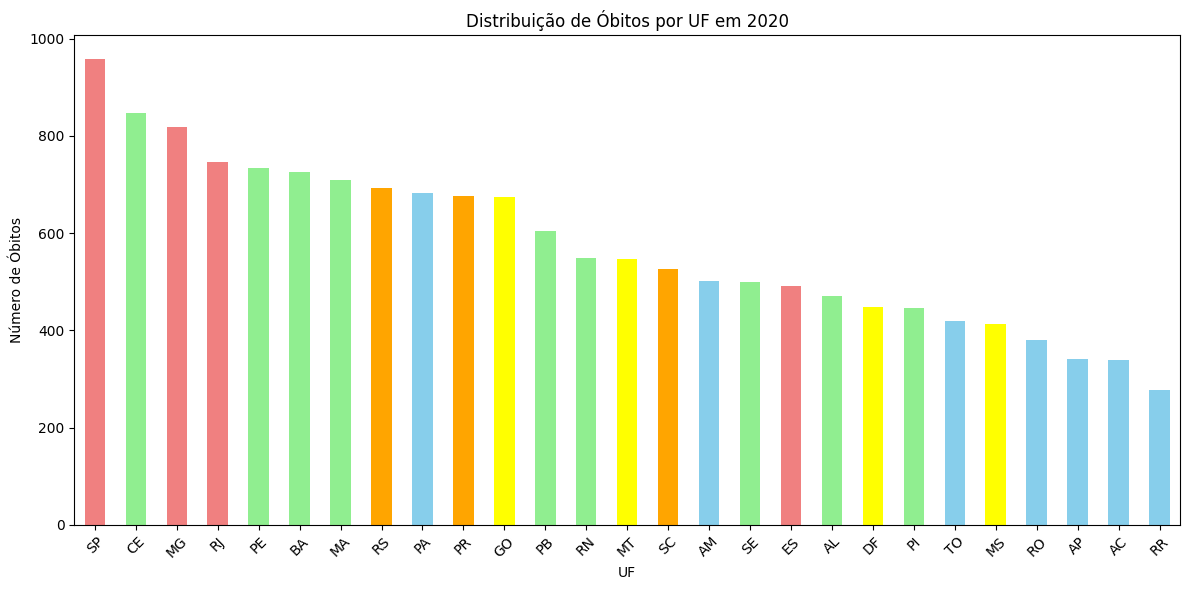

In [23]:
#Distribuição de Óbitos por UF

#Obtendo  contagem de óbitos por UF

uf_counts = df['uf'].value_counts()

#Mapeamento de cores para cada estado dentro de sua região
cores_estados = {
    'AC' : 'skyblue', 'AM' : 'skyblue', 'AP' : 'skyblue', 'PA' : 'skyblue', 'RO' : 'skyblue', 'RR' : 'skyblue', 'TO' : 'skyblue',
    'AL' : 'lightgreen', 'BA' : 'lightgreen', 'CE' : 'lightgreen', 'MA' : 'lightgreen', 'PB' : 'lightgreen', 'PE' : 'lightgreen',
    'PI' : 'lightgreen', 'RN' : 'lightgreen', 'SE' : 'lightgreen',
    'ES' : 'lightcoral', 'MG' : 'lightcoral', 'MG' : 'lightcoral', 'RJ' : 'lightcoral', 'SP' : 'lightcoral',
    'PR' : 'orange', 'SC' :  'orange', 'RS' :  'orange',
    'DF' : 'yellow', 'MT' : 'yellow', 'MS': 'yellow', 'GO' : 'yellow'
}


#Criando gráfico com cores difernetes para cada estado dentro de sua região

plt.figure(figsize=(12, 6))
uf_counts.plot(kind='bar', color=[cores_estados[uf] for uf in uf_counts.index])

#Adicionando título e rótulo aos eixos
plt.title('Distribuição de Óbitos por UF em 2020')
plt.xlabel('UF')
plt.ylabel('Número de Óbitos')

#Exibindo gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


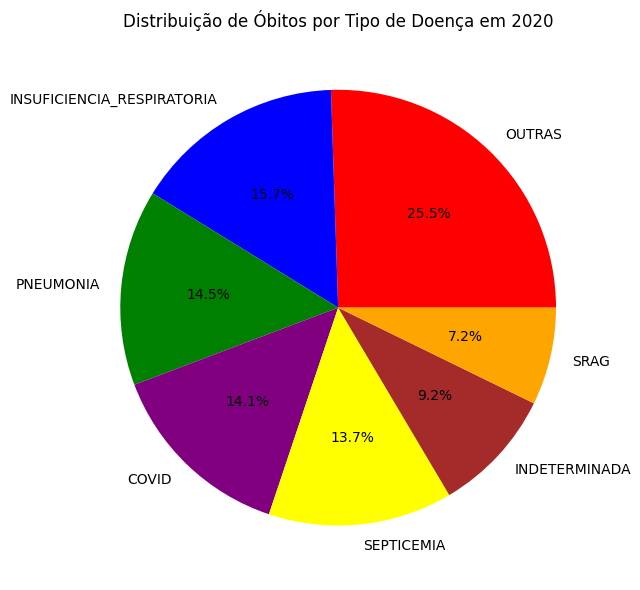

In [18]:
#Distribuição de Óbitos por Tipo de Doença

plt.figure(figsize=(8, 6))
df['tipo_doenca'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['red', 'blue', 'green', 'purple', 'yellow', 'brown', 'orange'])
plt.title('Distribuição de Óbitos por Tipo de Doença em 2020')
plt.ylabel('')
plt.tight_layout()
plt.show()

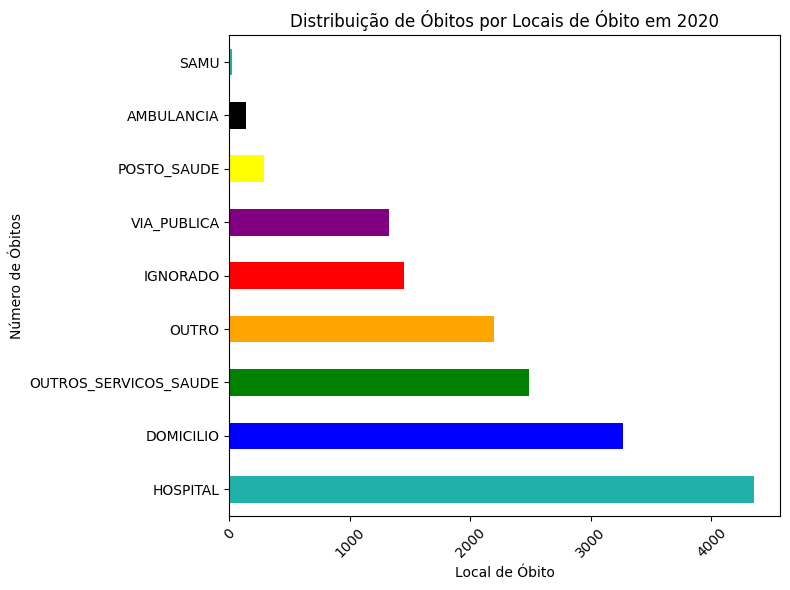

In [19]:
#Distribuição dos Óbitos por Locais de Óbito

plt.figure(figsize=(8, 6))
df['local_obito'].value_counts().plot(kind='barh', color=['lightseagreen', 'blue', 'green', 'orange', 'red', 'purple', 'yellow', 'black'])
plt.title('Distribuição de Óbitos por Locais de Óbito em 2020')
plt.xlabel('Local de Óbito')
plt.ylabel('Número de Óbitos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

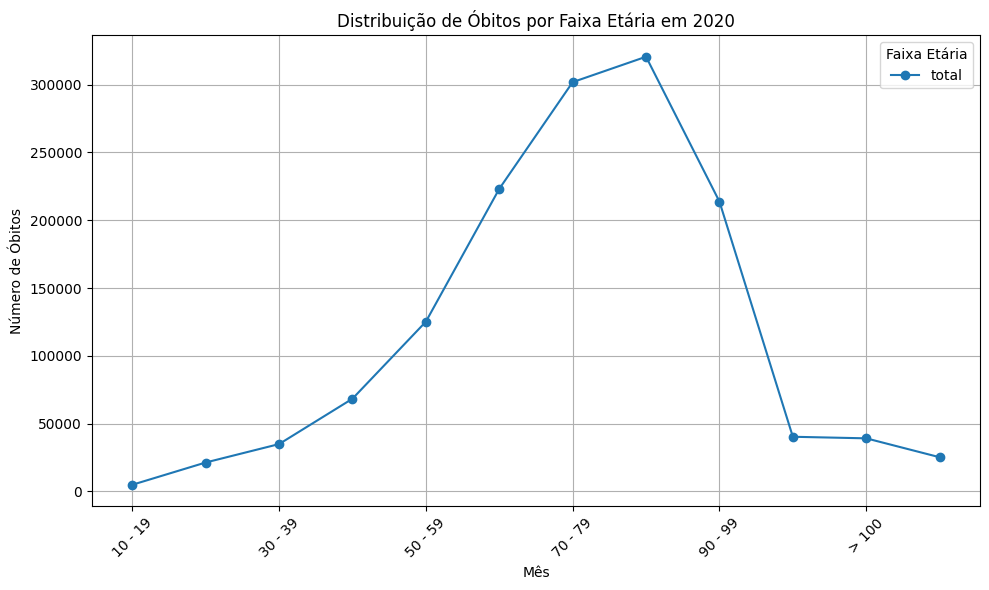

In [20]:
#Distribuição dos Óbitos por faixa etaria

#Agrupando os dados por faixa etária e data de óbito, contando o número de óbitos
faixa_etaria_por_data = df.groupby('faixa_etaria')['total'].sum()

#Criando Gráfico de linha
plt.figure(figsize=(10,6))
faixa_etaria_por_data.plot(kind='line', marker='o')

#Adicionando Títulos e Rótulos Para os Eixos

plt.title('Distribuição de Óbitos por Faixa Etária em 2020')
plt.xlabel('Mês')
plt.ylabel('Número de Óbitos')
plt.xticks(rotation=45)
plt.legend(title='Faixa Etária', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

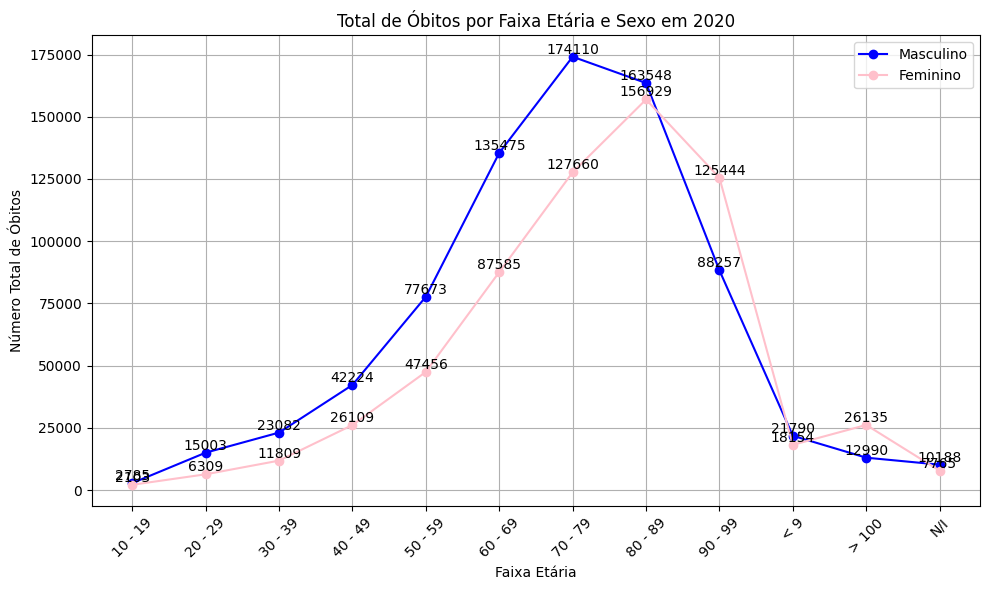

In [21]:
# Filtrando os dados por sexo
obitos_masculino = df[df['sexo'] == 'M']
obitos_feminino = df[df['sexo'] == 'F']

# Agrupando os dados por faixa etária e somando o total de óbitos para cada sexo
total_obitos_masculino = obitos_masculino.groupby('faixa_etaria')['total'].sum()
total_obitos_feminino = obitos_feminino.groupby('faixa_etaria')['total'].sum()

# Criando o gráfico de linha
plt.figure(figsize=(10, 6))

# Linha para o sexo masculino (M) em azul
plt.plot(total_obitos_masculino.index, total_obitos_masculino, marker='o', color='blue', label='Masculino')

# Linha para o sexo feminino (F) em vermelho
plt.plot(total_obitos_feminino.index, total_obitos_feminino, marker='o', color='pink', label='Feminino')

# Adicionando valores aos pontos do sexo masculino
for i, v in enumerate(total_obitos_masculino):
    plt.text(total_obitos_masculino.index[i], v, str(v), ha='center', va='bottom')

# Adicionando valores aos pontos do sexo feminino
for i, v in enumerate(total_obitos_feminino):
    plt.text(total_obitos_feminino.index[i], v, str(v), ha='center', va='bottom')

# Adicionando título e rótulos aos eixos
plt.title('Total de Óbitos por Faixa Etária e Sexo em 2020')
plt.xlabel('Faixa Etária')
plt.ylabel('Número Total de Óbitos')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()